## CS 5963 Project Milestone

# New York City Schools Survey

Group Members
Kara Johnson (u0409733) - E-mail: kjohnson@sci.utah.edu
Sara Johnson (u0884127) - E-mail: sara.l.johnson@utah.edu

## Background and Motivation (EDIT THIS)

Education is an important pillar in our society today. Many parents in America feel dissatisfied with the public school system. The goal of this project is to identify some factors which may contribute parent perceptions of their child's school. We will be using New York City as a model, as it has over 400 high schools and has made data from their annual school survey available for analysis. This survey collects responses to a number of questions pertaining to many aspects of education, but we are focusing on trust & family ties, safety, and personal attention & support as indicators of overall parent perception. We will investigate if parent perception of these aspects differ as a function of the school's location or educational opportunities such as AP courses or Career Training courses. By generating this predictive model, we can determine how to improve parent perceptions of schools in the future.

## Project Objectives (EDIT THIS)

Objective 1. We will be looking at the positive response rates that pertain to three "Educational Elements": Parent trust in the school, parent involvement, and parent response rate
- How do these elements relate to each other?
- How do these elements relate to the opportunities available at these schools (extracurriculars, AP classes, CTE)? 
- How do these elements differ between boroughs and/or districts?   
Objective 2. We are interested in looking at student perception of school safety a possible confounder in parent perceptions.
Objective 3. Finally, we will determine which factors could potentially improve parent perceptions of our education system
- These factors include AP and Career training availability, attendance rate, graduation rate, and percentage of positive student answers 

## Data

We collected and combined three datasets:
2016 New York City School Survey -- collects student and parent responses to surveys about their school,
High Schools At A Glance -- includes information about high school programs, Advanced Placement (AP) courses, and career training programs,
Demographic Snapshot -- demographic information including total enrollment, gender ratios, and race percentages at the city, borough, district, and school-level.
These datasets are available online in Excel spreadsheet format.
2016 New York City School Survey: http://schools.nyc.gov/Accountability/tools/survey/default.htm
High Schools At a Glance: http://schools.nyc.gov/ChoicesEnrollment/High/Resources/default.htm Demographic Snapshot: http://schools.nyc.gov/NR/rdonlyres/46093164-D8AA-40DD-A400-8F80CEBC8DD5/0/DemographicSnapshot201112to201516Public_FINAL.xlsx

## Data Processing

For the survey dataset, we selected a number of variables that we were interested in. These include:
Parent response rate
% Satisfaction with 'Collaborative Teachers'
% Satisfaction with 'School Leadership'
% Satisfaction with 'Rigorous Instruction'
% Satisfaction with 'Family-Community Ties'
% Satisfaction with 'Supportive Environment'
% Satisfaction with 'Trust'
% Overall Parent Satisfaction
% Overall Student Satisfaction
We also removed all schools that do not correlate with the "High School At a Glance" dataset. This was performed by matching the school's unique DBN number provided in both datasets.
We also extracted other variables from the "High School At a Glance" dataset that we will use for performing our analysis. These include:
Borough
Number of Programs
Neighborhood
Graduation Rate
Attendance Rate
% Students who feel safe
AP Courses
CTE Programs
AP Courses and CTE Programs categories were converted into a binary value: 1 for offered, 0 for not offered.
For the Demographics dataset, we extracted the following columns at the citywide, borough, district, and school-level:
Total enrollment
% Female, % Male
% Asian, Black, Hispanic, Other, or White
% Poverty
We also had to filter out the rows to extract only the data from the 2015-2016 school year.

In [1]:
### IMPORT DATA ####
import pandas as pd

#NYC School Survery Import (HSS): 
RespRate = pd.read_excel("2016 NYC School Survey Public Data.xlsx",sheetname = 0)

#High Schools At a Glance Import (HSAAG): 
schools = pd.read_csv('HSAAG_data/HSAAG_Schools.csv', encoding='latin-1',header=0)

#Demographics:
dem_school = pd.read_excel("DemographicSnapshot201112to201516Public_FINAL.xlsx",sheetname=3)



In [149]:
# 1.
### CLEAN DATA ####
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

 
# HSAAG - Keep columns of interest
schools = pd.read_csv('HSAAG_data/HSAAG_Schools.csv', encoding='latin-1',header=0)
schools.columns = ['rmv','School Name', 'DBN','Borough','Number of Programs','rmv2','rmv3', 'Neighborhood',
                   'Graduation Rate','Attendance Rate', '% students who feel safe','AP Courses y/n',
                   'rmv7', 'CTE y/n','rmv4', 'rmv5', 'rmv6']
school_cols = ['DBN', 'Borough', 'Number of Programs','Neighborhood', 'Graduation Rate', 
               'Attendance Rate','% students who feel safe', 'AP Courses y/n','CTE y/n']

schoolsDF = schools[school_cols]

# HSAAG - Change 'Graduation Rate', 'Attendance Rate', and '% students who feel safe' to decimals
schoolsDF['Graduation Rate'] = schoolsDF['Graduation Rate'].str.replace('%','').astype(float).apply(lambda x: x/100);
schoolsDF['Attendance Rate'] = schoolsDF['Attendance Rate'].str.replace('%','').astype(float).apply(lambda x: x/100);
schoolsDF['% students who feel safe'] = schoolsDF['% students who feel safe'].str.replace('%','').astype(float).apply(lambda x: x/100);

# HSAAG - Change Yes to 1. NaNs in this dataset correspond to 'No', so set NaNs to 0
# Index to DBN for easy comparison and merging of dataframes
schoolsDF = schoolsDF.fillna(0).replace('Yes',1).set_index('DBN')

# HSS - Keep columns of interest
RespRate.columns = ['DBN','School Name', 'Parent RR','Teacher RR','Student RR','Collab. Teachers','School Leadership',
                   'Rig. Instruction','Fam-Community Ties', 'Supportive Envment.','Trust','Parent PS',
                   'Student PS', 'Teacher PS']
RespRate_cols = ['DBN','Parent RR','Collab. Teachers','School Leadership','Rig. Instruction','Fam-Community Ties', 
                 'Supportive Envment.','Trust','Parent PS','Student PS']
schools2 = RespRate[RespRate_cols]

# Demographics - Keep columns of interest
dem_school_cols = ['DBN','Year', 'Total Enrollment','% Female','% Male','% Asian', '% Black', '% Hispanic','% Other',
                   '% White','% Students with Disabilities', '% Poverty']
demog = dem_school[dem_school_cols]

# Demographics - keep data from 2015-2016 school year
demo_rec = demog[demog['Year'] == '2015-16']
demog_cols = ['DBN','Total Enrollment','% Female','% Male','% Asian', '% Black', '% Hispanic','% Other',
                   '% White','% Students with Disabilities', '% Poverty']
demog = demo_rec[demog_cols]
# Demographics - combine minorities into single column
minorities = ['% Asian','% Black','% Hispanic','% Other']
demog['% Minority'] = demog[minorities].sum(axis=1)
demog_cols2 = ['DBN','Total Enrollment','% Female','% Male','% White','% Minority','% Poverty']
demog2 = demog[demog_cols2]

# Combine HSAAG and HSS by joining with School DBN as index 
schools_HS = schoolsDF.join(schools2.set_index('DBN'),how = 'inner')
schoolsN = schools_HS.join(demog2.set_index('DBN'), how = 'inner')

# Convert all non-strings to floats for easier processing 
schoolsN = schoolsN.apply(lambda x: pd.to_numeric(x,errors='ignore')).fillna(0)

#Rename the columns for easier referencing 
schoolsN.columns = ['Borough', 'NumberPrograms', 'Neighborhood', 'GraduationRate', 'AttendanceRate', 
         'PerStudentsSafe', 'APCourses', 'CTE', 'ParentRR', 'Collab_Teachers', 'School_Leadership',
         'Rig_Instruction', 'FamCommunity_Ties', 'Supportive_Envment', 'Trust', 'ParentPS', 
         'StudentPS', 'TotalEnrollment', 'PerFemale', 'PerMale','PerWhite', 'PerMinority','PerPoverty']



C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [150]:
#2. 
### CLEAN DATA ##### 

#Determine if there are "0" values in the survey results 
investigate = ['ParentRR', 'Collab_Teachers', 'School_Leadership','Rig_Instruction', 'FamCommunity_Ties', 'Supportive_Envment', 'Trust', 'ParentPS', 
         'StudentPS', 'TotalEnrollment']

schoolsT = schoolsN[investigate]
Idx = []
Col = []
Value = []
test = schoolsT.iterrows()

for index,row in schoolsT.iterrows(): 
    for col in schoolsT.columns.tolist():
        if schoolsT.loc[index,col] == 0:
            Idx.append(index)
            Col.append(col)
            Value.append(schoolsT.loc[index,col])        
Zeros = pd.DataFrame({'Row':Idx,'Column':Col,'Value':Value})
Zeros = Zeros[['Row','Column','Value']] 
print('Cells with 0-value: ')
Zeros

Cells with 0-value 


,Row,Column,Value
0,05M367,ParentPS,0.0
1,12X479,ParentPS,0.0


Since two schools are missing data for the ParentPS category, we will remove these schools from the analysis below. 

In [152]:
#3.
### CLEAN DATA ####

#filter out schools w/o Parent PS data 
schoolsN = schoolsN[schoolsN['ParentPS'] > 0]
print(schoolsN.shape)

#Add a column which is the difference in Parent and Student Satisfaction rate for all schools
schoolsN['ParentStudentPS_Diff'] = schoolsN['ParentPS'] - schoolsN['StudentPS'] 


(436, 23)


### Exploratory Data Analysis

We first wanted to characterize the schools by the NYC borough they were located in (Brooklyn, the Bronx, Manhatten, Queens, and Statten Island) to determine if there are any clear trends with geography, or if any borough stands out from the rest. 

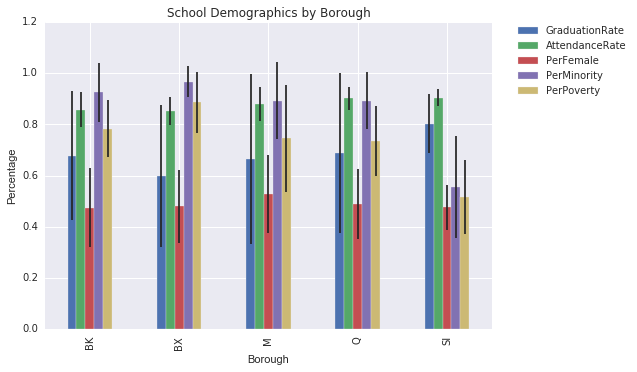

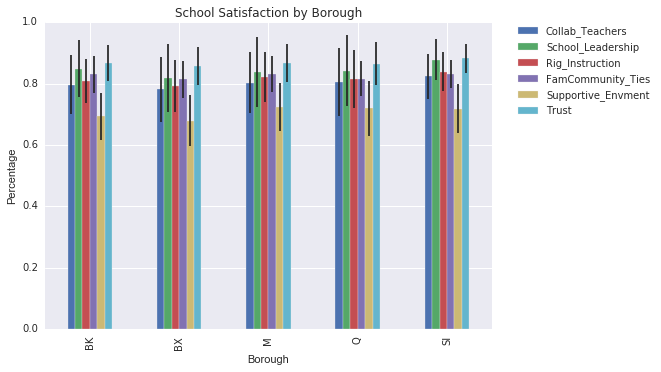

In [157]:
### EDA ####
import seaborn as sns
sns.set()

dfplt1 = schoolsN[[0,3,4,18,21,22]]
dfplt2 = schoolsN[[0,9,10,11,12,13,14]]

Borough_means = dfplt1.groupby('Borough').mean()
Borough_std = dfplt1.groupby('Borough').std()
Borough_means.plot.bar(yerr=Borough_std)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Percentage')
plt.title('School Demographics by Borough') 

Borough_means = dfplt2.groupby('Borough').mean()
Borough_std = dfplt2.groupby('Borough').std()
Borough_means.plot.bar(yerr=Borough_std)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Percentage')
plt.title('School Satisfaction by Borough') 



**Borough Demographics** There is less variability between boroughs in attendance rate and percent female than in the other demographic qualities. Statten Island has notably lower percentages of minorities and students living in poverty than the other four boroughs. Additionally, Statten Island has the highest graduation rate. However, the remaining boroughs are relatively similar in these three demographic variables. 

**Borough Survey Responses** In contrast to the demographic data, there is little variation in the average percent satisfaction (PS) in six survey categories. However, PS in "Supportive Environment" is significantly lower than the other categories in all boroughs. 

Next, we plot Student and Parent overall satisfaction against attendance and graduation rate. To simultaneously investigate a dependence on school size, we sized the data points proportionally to Enrollment.  

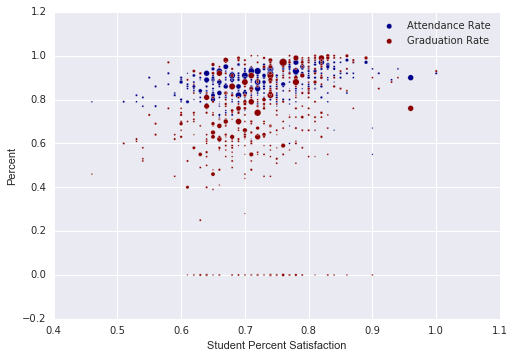

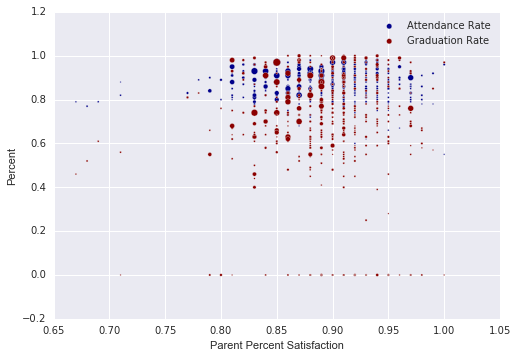

In [159]:
#scatter plot of poverty with school statistics 
ax = schoolsN.plot.scatter(x='StudentPS', y='AttendanceRate', color='DarkBlue', label='Attendance Rate',s=schoolsN['TotalEnrollment']*.01);
schoolsN.plot.scatter(x='StudentPS', y='GraduationRate', color='DarkRed', label='Graduation Rate',s=schoolsN['TotalEnrollment']*.01,ax=ax);
plt.ylabel('Percent') 
plt.xlabel('Student Percent Satisfaction')

ax = schoolsN.plot.scatter(x='ParentPS', y='AttendanceRate', color='DarkBlue', label='Attendance Rate',s=schoolsN['TotalEnrollment']*.01);
schoolsN.plot.scatter(x='ParentPS', y='GraduationRate', color='DarkRed', label='Graduation Rate',s=schoolsN['TotalEnrollment']*.01,ax=ax);
plt.ylabel('Percent') 
plt.xlabel('Parent Percent Satisfaction') 

Overall Parent satisfaction with the school (Parent PS) is uncorrelated with graduation rate (correlation is < 0.2), while overall Student satisfaction is positively correlated with both attendance and graduation rate. 

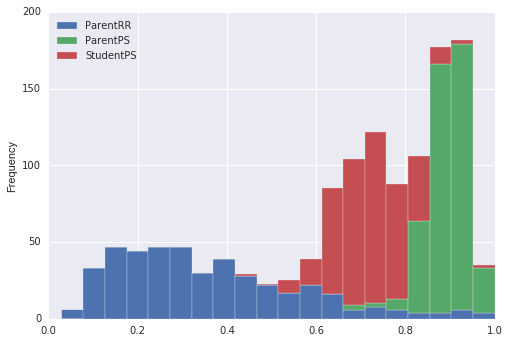

In [161]:
dfplt = schoolsN[['ParentRR','ParentPS','StudentPS']]
plt.figure();
dfplt.plot.hist(stacked=True, bins=20);

In [165]:
#results = results.where(abs(results) > .4)

results = schoolsN.corr()

Var1 = []
Var2 = []
Correlation = []
for index,row in results.iterrows(): 
    for col in results.columns.tolist():
        if (abs(results.loc[index,col]) >= .2) & (abs(results.loc[index,col]) < .4): 
            Var1.append(index)
            Var2.append(col)
            Correlation.append(results.loc[index,col])        
LowCor = pd.DataFrame({'Var1':Var1,'Var2':Var2,'Correlation':Correlation})
LowCor = LowCor[['Var1','Var2','Correlation']] 
print('Variables with Low Correlation: ')
LowCor2 = LowCor[(LowCor['Var1'] == 'ParentRR') | (LowCor['Var1'] == 'ParentPS') | 
                 (LowCor['Var1'] == 'StudentPS') | (LowCor['Var1'] == 'ParentStudentPS_Diff')]
print(LowCor2)

Var1 = []
Var2 = []
Correlation = []
#print(schoolsN[cols3].corr())
#results.columns.tolist()
for index,row in results.iterrows(): 
    for col in results.columns.tolist():
        if (abs(results.loc[index,col]) >= .4) & (abs(results.loc[index,col]) < .6): 
            Var1.append(index)
            Var2.append(col)
            Correlation.append(results.loc[index,col])
            
MedCor = pd.DataFrame({'Var1':Var1,'Var2':Var2,'Correlation':Correlation})
MedCor = MedCor[['Var1','Var2','Correlation']] 
print('Variables with Medium Correlation: ')
MedCor2 = MedCor[(MedCor['Var1'] == 'ParentRR') | (MedCor['Var1'] == 'ParentPS') | 
                 (MedCor['Var1'] == 'StudentPS') | (MedCor['Var1'] == 'ParentStudentPS_Diff')]
print(MedCor2)

Var1 = []
Var2 = []
Correlation = []
for index,row in results.iterrows(): 
    for col in results.columns.tolist():
        if (abs(results.loc[index,col]) >= .6) & (abs(results.loc[index,col]) < 1): 
            Var1.append(index)
            Var2.append(col)
            Correlation.append(results.loc[index,col])
            
HighCor = pd.DataFrame({'Var1':Var1,'Var2':Var2,'Correlation':Correlation})
HighCor = HighCor[['Var1','Var2','Correlation']] 
print('Variables with High Correlation: ')
HighCor2 = HighCor[(HighCor['Var1'] == 'ParentRR') | (HighCor['Var1'] == 'ParentPS') 
                   | (HighCor['Var1'] == 'StudentPS') | (HighCor['Var1'] == 'ParentStudentPS_Diff')]
print(HighCor2)





Variables with Low Correlation: 
                    Var1                  Var2  Correlation
31              ParentRR       PerStudentsSafe     0.265277
32              ParentRR       Collab_Teachers     0.295202
33              ParentRR     School_Leadership     0.278125
34              ParentRR       Rig_Instruction     0.316165
35              ParentRR     FamCommunity_Ties     0.377738
36              ParentRR                 Trust     0.289130
37              ParentRR              ParentPS     0.316685
38              ParentRR  ParentStudentPS_Diff    -0.306353
64              ParentPS       PerStudentsSafe     0.291677
65              ParentPS              ParentRR     0.316685
66              ParentPS       Collab_Teachers     0.312279
67              ParentPS       Rig_Instruction     0.325689
68             StudentPS        AttendanceRate     0.293740
93  ParentStudentPS_Diff        AttendanceRate    -0.306642
94  ParentStudentPS_Diff              ParentRR    -0.306353
95  Par

Variables which are highly correlated to Student PS include Supportive Environment, Rigorous Instruction, Percent of Students Who Feel Safe, and Trust. While the only variable highly correlated with Parent PS is Family-Community Ties. Trust, Supportive Environment, and School Leadership are moderately correlated with Parent PS as well. Finally, three variables, Percent of Students Who Feel Safe, Rigorous Instruction, and Supportive Environment, are correlated with the gap between Parent and Student PS. The negative correlations indicate that as the gap in overall satisfaction increases, the percent satisfaction in Supportive Environment decreases. 

### Multi-Linear Regression

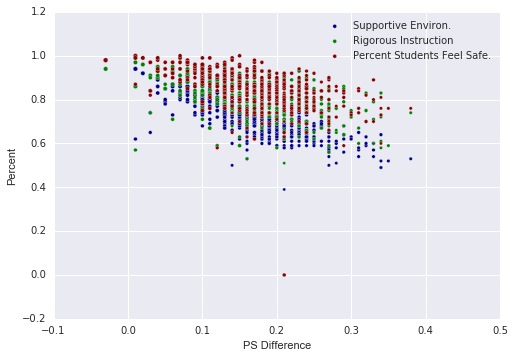

In [175]:
ax = schoolsN.plot.scatter(x='ParentStudentPS_Diff', y='Supportive_Envment', color='DarkBlue', label='Supportive Environ.',s=schoolsN['StudentPS']*20);
schoolsN.plot.scatter(x='ParentStudentPS_Diff', y='Rig_Instruction', color='Green', label='Rigorous Instruction',s=schoolsN['StudentPS']*20,ax=ax);
schoolsN.plot.scatter(x='ParentStudentPS_Diff', y='PerStudentsSafe', color='DarkRed', label='Percent Students Feel Safe.',s=schoolsN['StudentPS']*20,ax=ax);

plt.ylabel('Percent') 
plt.xlabel('PS Difference') 

In [176]:
import scipy as sc
from scipy.stats import linregress
from scipy.stats import norm

import statsmodels.formula.api as sm


model = sm.ols(formula="ParentPS ~ FamCommunity_Ties", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

#model = sm.ols(formula="ParentPS ~ FamCommunity_Ties + Trust", data=schoolsN)
#model_result = model.fit()
#print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
#print('P-values: \n' + str(model_result.pvalues) + '\n')

#model = sm.ols(formula="ParentPS ~ FamCommunity_Ties + Supportive_Envment", data=schoolsN)
# model_result = model.fit()
# print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
# print('P-values: \n' + str(model_result.pvalues) + '\n')

# model = sm.ols(formula="ParentPS ~ FamCommunity_Ties + School_Leadership", data=schoolsN)
# model_result = model.fit()
# print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
# print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="ParentPS ~ School_Leadership + Supportive_Envment + Trust + FamCommunity_Ties",
               data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="ParentPS ~ School_Leadership + Trust + FamCommunity_Ties",
               data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

ParentPS ~ FamCommunity_Ties R-squared: 0.713746353759
P-values: 
Intercept             2.311686e-67
FamCommunity_Ties    5.898579e-120
dtype: float64

ParentPS ~ School_Leadership + Supportive_Envment + Trust + FamCommunity_Ties R-squared: 0.762958715214
P-values: 
Intercept             1.009879e-19
School_Leadership     6.517901e-10
Supportive_Envment    9.025500e-01
Trust                 1.743682e-15
FamCommunity_Ties     3.651534e-96
dtype: float64

ParentPS ~ School_Leadership + Trust + FamCommunity_Ties R-squared: 0.762950460352
P-values: 
Intercept            1.760006e-20
School_Leadership    5.210792e-10
Trust                1.010185e-17
FamCommunity_Ties    1.176664e-98
dtype: float64



C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  if __name__ == '__main__':


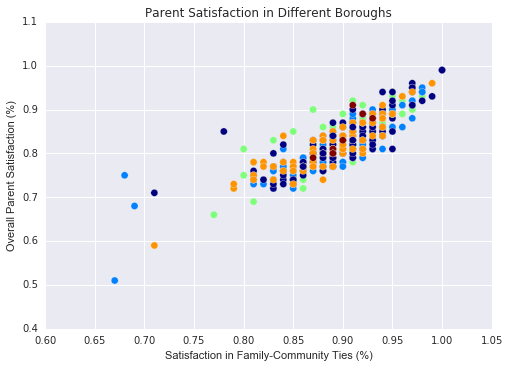

In [177]:
schoolsN['BoroughNum'] = pd.Categorical(schoolsN["Borough"]).labels

plt.scatter(schoolsN['ParentPS'],schoolsN['FamCommunity_Ties'],c=schoolsN['BoroughNum'], s=50, cmap='jet');
plt.xlabel('Satisfaction in Family-Community Ties (%)');
plt.ylabel('Overall Parent Satisfaction (%)');
plt.title('Parent Satisfaction in Different Boroughs') 


In [178]:
model = sm.ols(formula="StudentPS ~ Supportive_Envment", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

# model = sm.ols(formula="StudentPS ~ Rig_Instruction + Supportive_Envment", data=schoolsN)
# model_result = model.fit()
# print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
# print('P-values: \n' + str(model_result.pvalues) + '\n')

# model = sm.ols(formula="StudentPS ~ PerStudentsSafe + Supportive_Envment", data=schoolsN)
# model_result = model.fit()
# print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
# print('P-values: \n' + str(model_result.pvalues) + '\n')

# model = sm.ols(formula="StudentPS ~ Trust + Supportive_Envment", data=schoolsN)
# model_result = model.fit()
# print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
# print('P-values: \n' + str(model_result.pvalues) + '\n')

# model = sm.ols(formula="StudentPS ~ Collab_Teachers + Supportive_Envment", data=schoolsN)
# model_result = model.fit()
# print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
# print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="StudentPS ~ Rig_Instruction + PerStudentsSafe + Trust + Collab_Teachers + Supportive_Envment", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="StudentPS ~ Trust + Collab_Teachers + Supportive_Envment", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

StudentPS ~ Supportive_Envment R-squared: 0.959991039711
P-values: 
Intercept              2.114394e-42
Supportive_Envment    1.819267e-305
dtype: float64

StudentPS ~ Rig_Instruction + PerStudentsSafe + Trust + Collab_Teachers + Supportive_Envment R-squared: 0.976308876374
P-values: 
Intercept              3.510849e-15
Rig_Instruction        2.912284e-01
PerStudentsSafe        1.788434e-01
Trust                  6.064047e-12
Collab_Teachers        2.078056e-32
Supportive_Envment    7.559125e-260
dtype: float64

StudentPS ~ Trust + Collab_Teachers + Supportive_Envment R-squared: 0.976138484756
P-values: 
Intercept              3.578356e-15
Trust                  4.350670e-12
Collab_Teachers        3.292533e-44
Supportive_Envment    8.091467e-310
dtype: float64



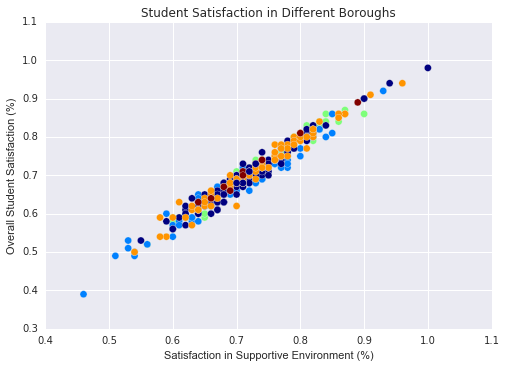

In [179]:
plt.scatter(schoolsN['StudentPS'],schoolsN['Supportive_Envment'],c=schoolsN['BoroughNum'], s=50, cmap='jet');
plt.xlabel('Satisfaction in Supportive Environment (%)');
plt.ylabel('Overall Student Satisfaction (%)');
plt.title('Student Satisfaction in Different Boroughs')
   

**Categorizing schools with a Student-Parent PS gap greater than 3 standard deviations of the Parent PS as "1" and "0" otherwise. Using 'Rig_Instruction','Supportive_Envment','PerStudentsSafe' as variables in the clustering techniques. **

0.13945406046516004
PSDiffBool
0    121
1    315
Name: Borough, dtype: int64


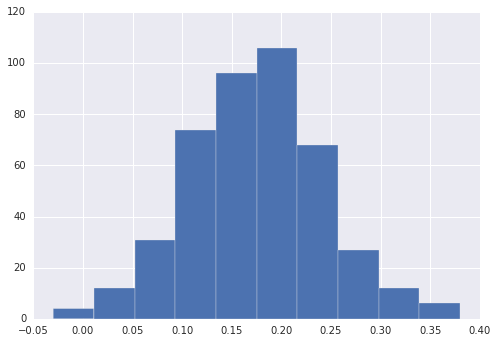

In [180]:
import numpy as np
#find standard deviation of Parent PS 
PPS = schoolsN['ParentPS']
stdPPS = np.std(PPS)
print(3*stdPPS)


#set Parent-Student PS difference to 1 if greater than 2*stdPPS and 0 otherwise

schoolsN['PSDiffBool'] = np.where(schoolsN['ParentStudentPS_Diff'] <=3*stdPPS,0,1)

LargeDiff = schoolsN.groupby('PSDiffBool').count()
print(LargeDiff['Borough'])
schoolsN.head()

plt.hist(schoolsN['ParentStudentPS_Diff']);

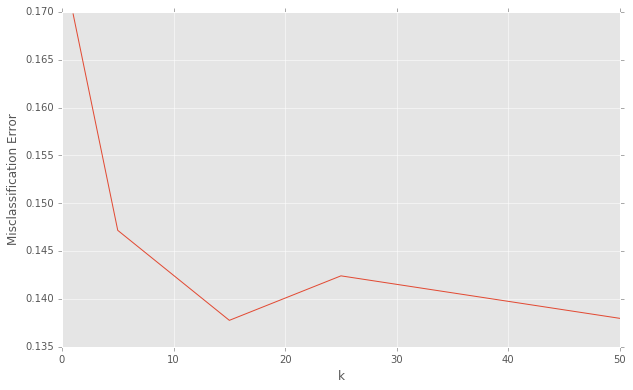

Best K-value:  15
Accuracy on training data =  0.876146788991
Accuracy on test data =  0.862385321101


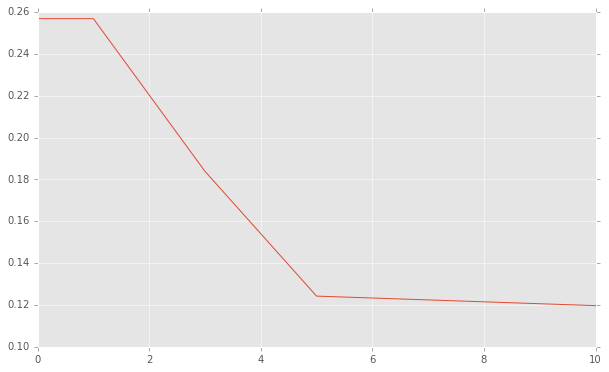

Best C:  [5]
Accuracy on training data=  0.871559633028
Accuracy on test data=  0.834862385321


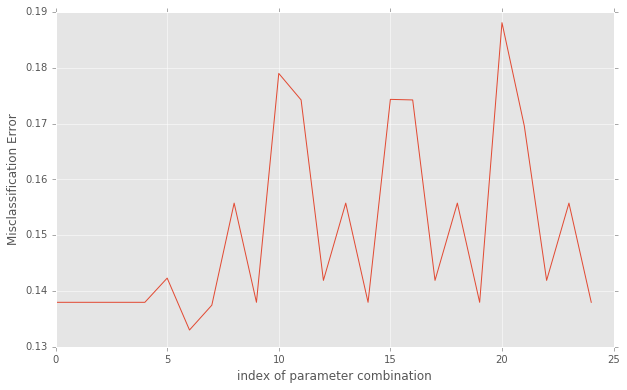

Best Depth and Min Samples:  [5, 5]
Accuracy on training data=  0.912844036697
Accuracy on test data=  0.876146788991


In [111]:
from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_predict, cross_val_score, KFold

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

schoolsN['Borough_bool'] = schoolsN['Borough'].map({'M':0, 'BX':1, 'BK':2, 'Q':3, 'SI':4})

### ALTER SECTION #########################

# Define predictor variables 
pred_cols = ['Rig_Instruction','Supportive_Envment','PerStudentsSafe'] #[10,12,14] # School 
#['Borough', 'NumberPrograms', 'Neighborhood', 'GraduationRate',
#       'AttendanceRate', 'PerStudentsSafe', 'APCourses', 'CTE', 'ParentRR',
#       'Collab_Teachers', 'School_Leadership', 'Rig_Instruction',
#       'FamCommunity_Ties', 'Supportive_Envment', 'Trust', 'ParentPS',
#       'StudentPS', 'TotalEnrollment', 'PerFemale', 'PerMale', 'PerWhite',
#       'PerMinority', 'PerPoverty', 'ParentStudentPS_Diff']

pred_vars = schoolsN[pred_cols].as_matrix()
class_Bool = schoolsN['PSDiffBool']

#### ALTER SECTION #########################

# Training set
predTrain, predTest, classTrain, classTest = train_test_split(pred_vars, class_Bool, random_state=1, test_size=0.5)

# 1. K-NN
neighbors = [1, 5, 15, 25, 50]
scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = cross_val_score(knn, predTrain, classTrain, cv=5, scoring='accuracy')
    scores.append(cv.mean())

error = [1 - s for s in scores]
bestK = neighbors[error.index(min(error))]
plt.plot(neighbors, error)
plt.xlabel('k')
plt.ylabel('Misclassification Error')
plt.show()

k = 15
test = KNeighborsClassifier(n_neighbors=k)
test.fit(predTrain, classTrain)

test_y_pred = test.predict(predTest)
train_y_pred = test.predict(predTrain)

print('Best K-value: ', bestK)
print('Accuracy on training data = ', metrics.accuracy_score(y_true = classTrain, y_pred = train_y_pred))
print('Accuracy on test data = ', metrics.accuracy_score(y_true = classTest, y_pred = test_y_pred))

# 2. SVM

# Cross-validation to choose C
c = [0.01, 0.1, 1, 3, 5, 10]
Cscores = []
for i in c: 
    svm_model = svm.SVC(kernel='rbf', C = i)
    SVMscores = cross_val_score(svm_model, predTrain, classTrain, cv=5, scoring='accuracy')    
    Cscores.append(SVMscores.mean())
        
CError = [1 - t for t in Cscores]

bestC = [CError.index(min(CError))]

plt.plot(c,CError)
plt.show()

# Run and fit the model on the full data
svmX = svm.SVC(kernel='rbf',C=5)
svmX.fit(predTrain, classTrain)

print('Best C: ', bestC)

y_train = svmX.predict(predTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = classTrain, y_pred = y_train))

y_test = svmX.predict(predTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = classTest, y_pred = y_test))


# 3. Decision Tree
# Cross-validation to choose max tree depth and minimum samples split
depths = [1, 5,10,25,50]
minSamples = [1, 5, 10, 30, 50]
treeScores = []
inputs = []

for d in depths:
    for minsamp in minSamples:
        decTree = tree.DecisionTreeClassifier(max_depth=d, min_samples_split=minsamp)
        cvs = cross_val_score(decTree, predTrain, classTrain, cv=5, scoring='accuracy')
        inputs.append([d,minsamp])
        treeScores.append(cvs.mean())

treeError = [1 - x for x in treeScores]

bestParam = [treeError.index(min(treeError))]
idx = int(bestParam[0])
bestInputs = inputs[idx]

plt.plot(list(range(len(treeError))), treeError)
plt.xlabel('index of parameter combination')
plt.ylabel('Misclassification Error')
plt.show()
print('Best Depth and Min Samples: ', bestInputs )

decisionTree = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5)
decisionTree = decisionTree.fit(predTrain, classTrain)

y_pred_train = decisionTree.predict(predTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = classTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(predTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = classTest, y_pred = y_pred))